### Introduction About the Data :

**The dataset** The goal is to predict `Time_Taken` to deliver food to the customer (Regression Analysis).

There are 19 independent variables (including `ID`):

* `ID` : unique identifier of each delivery
* `Delivery_person_ID` : refers to the unique ID of the delivery person.
* `Delivery_person_Age` : Age of the delivery person.
* `Delivery_person_Ratings` : Ratings of the delivery person.
* `Restaurant_latitude` : Latitude of the restaurant.
* `Restaurant_longitude` : Longitude of the restaurant.
* `Delivery_location_latitude` : Latitude of the delivery location.
* `Delivery_location_longitude` : Longitude of the delivery location.
* `Order_Date` : Date when the food was ordered.
* `Time_Orderd` : Time when the food was ordered (24hr clock)
* `Time_Order_picked` : Time when the food was picked (24hr clock)
* `Weather_conditions` : Weather conditions on the time of delivery.
* `Road_traffic_density` : Road traffic conditions on the time of delivery.
* `Vehicle_condition` : Condition of the vehicle
* `Type_of_order` : Type of the order.
* `Type_of_vehicle` : Type of the vehicle used to deliver.
* `multiple_deliveries` : Number of deliveries carried out during a particular delivery.
* `Festival` : Flag to identify if the delivery was done on a festival day.
* `City` : Type of city



Target variable:
* `Time_taken (min)`: Time taken for the delivery.

In [18]:
import pandas as pd
import numpy as np

In [19]:
## Data Ingestion
df = pd.read_csv("data/finalTrain.csv")

In [20]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [21]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [23]:
df.shape

(45584, 20)

In [24]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [25]:
df_copy = df

In [26]:
df_copy.head(2)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23


In [27]:
## Let's drop ID column

df_copy = df_copy.drop(labels=["ID"], axis=1)

In [28]:
df_copy.head(2)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23


In [29]:
## Check for duplicated records
df_copy.duplicated().sum()

0

In [30]:
# Impute missing values
df_copy.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [31]:
df_copy["Delivery_person_Age"].unique()

array([36., 21., 23., 34., 24., 29., 35., 33., 25., 31., 37., 27., 32.,
       26., 38., 20., 22., nan, 28., 39., 30., 15., 50.])

In [32]:
df_copy["Delivery_person_Age"].isna().sum()

1854

In [33]:
np.mean(df_copy["Delivery_person_Age"])

29.566910587697233

In [34]:
df_copy["Delivery_person_Age"] = df_copy["Delivery_person_Age"].fillna(np.mean(df_copy["Delivery_person_Age"]))

In [35]:
df_copy.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [36]:
## Handling missing values for Delivery_person_Ratings

df["Delivery_person_Ratings"].unique()

array([4.2, 4.7, 4.3, 4.5, 4. , 4.9, 4.1, 5. , 4.8, 3.5, 4.6, nan, 4.4,
       3.8, 3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4,
       2.8, 2.9, 3. ])

In [37]:
np.mean(df["Delivery_person_Ratings"])

4.6337736972250205

In [38]:
df_copy["Delivery_person_Ratings"] = df_copy["Delivery_person_Ratings"].fillna(np.mean(df["Delivery_person_Ratings"]))

In [39]:
df_copy["Delivery_person_Ratings"].isna().sum()

0

In [40]:
## Handling missing values for Time_Orderd

df["Time_Orderd"].unique()


array(['21:55', '14:55', '17:30', '09:20', '19:50', '20:25', '20:30',
       '20:40', '21:15', '20:20', '22:30', '08:15', '19:30', '12:25',
       '18:35', '20:35', '23:20', '21:20', '23:35', '22:35', '23:25',
       '13:35', '21:35', '18:55', '14:15', '0.458333333', '09:45',
       '08:40', '0.958333333', '17:25', nan, '19:45', '19:10', '10:55',
       '21:40', '0.791666667', '16:45', '11:30', '15:10', '22:45',
       '22:10', '20:45', '22:50', '17:55', '09:25', '20:15', '22:25',
       '22:40', '23:50', '15:25', '10:20', '20:55', '10:40', '15:55',
       '20:10', '12:10', '15:30', '10:35', '21:10', '20:50', '12:35',
       '0.875', '23:40', '18:15', '18:20', '11:45', '12:45', '23:30',
       '10:50', '21:25', '10:10', '17:50', '22:20', '12:40', '23:55',
       '10:25', '08:45', '23:45', '19:55', '22:15', '23:10', '09:15',
       '18:25', '18:45', '16:50', '1', '14:20', '10:15', '08:50', '0.375',
       '17:45', '16:35', '08:30', '21:45', '19:40', '14:50', '18:10',
       '12:20', '12

In [41]:
df_copy["Time_Orderd"].dtype

dtype('O')

In [42]:
df_copy["Time_Orderd"].isna().sum()

1731

In [43]:
df_copy["Time_Orderd"].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
45579    False
45580    False
45581    False
45582    False
45583    False
Name: Time_Orderd, Length: 45584, dtype: bool

In [44]:
df_copy[df_copy["Time_Orderd"].isna() == False]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [45]:
df_copy = df_copy[df_copy["Time_Orderd"].isna() == False]

In [46]:
df_copy.shape

(43853, 19)

In [47]:
df_copy.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             943
Festival                        219
City                           1144
Time_taken (min)                  0
dtype: int64

In [48]:
## Handling missing values for multiple_deliveries

df["multiple_deliveries"].unique()

array([ 3.,  1.,  0., nan,  2.])

In [49]:
np.mean(df["multiple_deliveries"])

0.7446345675136238

In [50]:
np.round(np.mean(df["multiple_deliveries"]))

1.0

In [51]:
df_copy["multiple_deliveries"]=df_copy["multiple_deliveries"].fillna(np.round(np.mean(df["multiple_deliveries"])))

In [52]:
df_copy["multiple_deliveries"].isna().sum()

0

In [53]:
df_copy.isna().sum()

Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                        219
City                           1144
Time_taken (min)                  0
dtype: int64

In [54]:
## Handling missing values for Festival

df_copy["Festival"].unique()

array(['No', 'Yes', nan], dtype=object)

In [55]:
import statistics as stats

In [56]:
stats.mode(df_copy["Festival"])

'No'

In [57]:
df_copy["Festival"] = df_copy["Festival"].fillna(stats.mode(df_copy["Festival"]))

In [58]:
df_copy.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                       0
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                           1144
Time_taken (min)                  0
dtype: int64

In [59]:
## Handling missing values for City

df_copy["City"].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban', nan], dtype=object)

In [60]:
stats.mode(df_copy["City"])

'Metropolitian'

In [61]:
df_copy["City"] = df_copy["City"].fillna(stats.mode(df_copy["City"]))

In [62]:
df_copy.isnull().sum()

Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64

In [63]:
df_copy.to_csv("./data/Cleaned_Data.csv",index=False)

In [64]:
df = pd.read_csv("./data/Cleaned_Data.csv")

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43853 entries, 0 to 43852
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_ID           43853 non-null  object 
 1   Delivery_person_Age          43853 non-null  float64
 2   Delivery_person_Ratings      43853 non-null  float64
 3   Restaurant_latitude          43853 non-null  float64
 4   Restaurant_longitude         43853 non-null  float64
 5   Delivery_location_latitude   43853 non-null  float64
 6   Delivery_location_longitude  43853 non-null  float64
 7   Order_Date                   43853 non-null  object 
 8   Time_Orderd                  43853 non-null  object 
 9   Time_Order_picked            43853 non-null  object 
 10  Weather_conditions           43853 non-null  object 
 11  Road_traffic_density         43853 non-null  object 
 12  Vehicle_condition            43853 non-null  int64  
 13  Type_of_order   

In [66]:
df.isnull().sum()

Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weather_conditions             0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken (min)               0
dtype: int64

In [67]:
df.dtypes

Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
dtype: object

In [68]:
# Seggregate into numerical and categorical columns

numerical_columns = df.columns[df.dtypes != "O"]
categorical_columns = df.columns[df.dtypes == "O"]
print("Numerical columns : ", numerical_columns)
print("Categorical columns : ", categorical_columns)

Numerical columns :  Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Vehicle_condition',
       'multiple_deliveries', 'Time_taken (min)'],
      dtype='object')
Categorical columns :  Index(['Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


In [69]:
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,43853.0,29.554838,5.747303,20.000000,25.000000,30.000000,35.000000,39.000000
Delivery_person_Ratings,43853.0,4.635271,0.312891,2.500000,4.500000,4.700000,4.900000,5.000000
Restaurant_latitude,43853.0,17.242245,7.699200,-30.902872,12.933298,18.554382,22.732225,30.914057
Restaurant_longitude,43853.0,70.763328,21.138033,0.000000,73.170283,75.898497,78.045359,88.433452
Delivery_location_latitude,43853.0,17.462771,7.338998,0.010000,12.986229,18.633934,22.785049,31.054057
Delivery_location_longitude,43853.0,70.826921,21.138202,0.010000,73.279083,75.999490,78.103162,88.563452
Vehicle_condition,43853.0,1.000912,0.816543,0.000000,0.000000,1.000000,2.000000,2.000000
multiple_deliveries,43853.0,0.749595,0.567630,0.000000,0.000000,1.000000,1.000000,3.000000
Time_taken (min),43853.0,26.293161,9.374274,10.000000,19.000000,26.000000,32.000000,54.000000


In [70]:
df[categorical_columns].describe().T

,count,unique,top,freq
Delivery_person_ID,43853,1320,JAPRES09DEL02,65
Order_Date,43853,44,15-03-2022,1145
Time_Orderd,43853,176,21:55,461
Time_Order_picked,43853,193,21:30,483
Weather_conditions,43853,6,Fog,7475
Road_traffic_density,43853,4,Low,15061
Type_of_order,43853,4,Snack,11088
Type_of_vehicle,43853,3,motorcycle,25627
Festival,43853,2,No,42996
City,43853,3,Metropolitian,33940


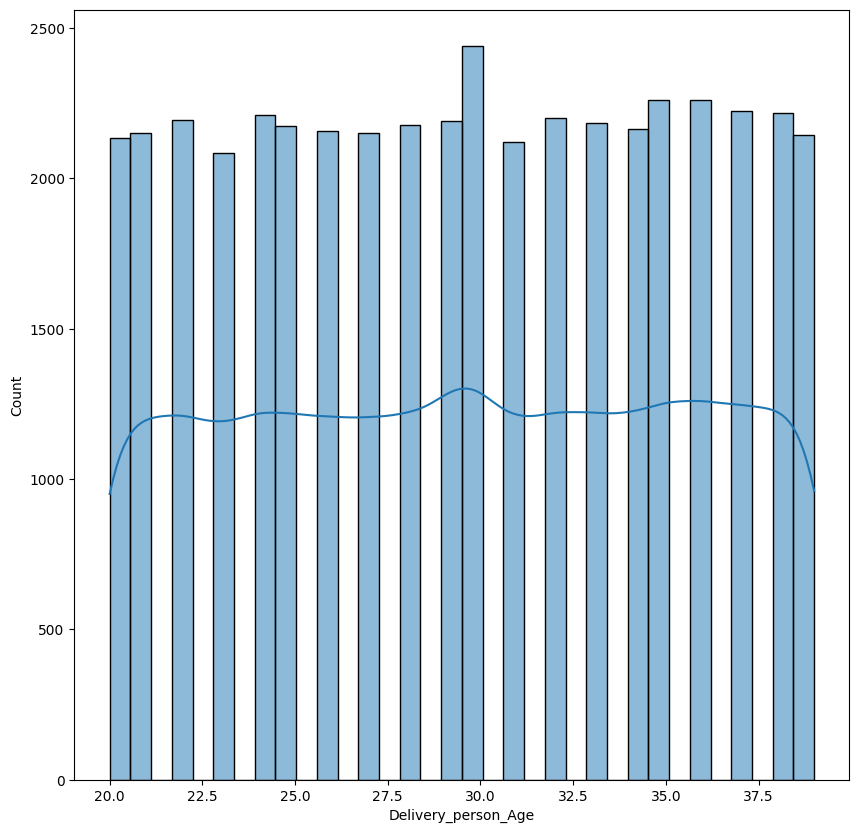

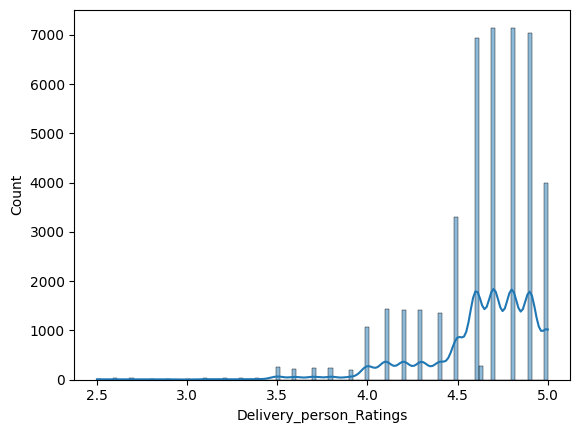

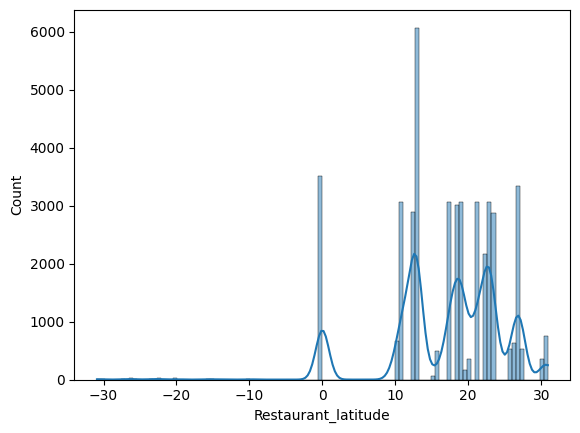

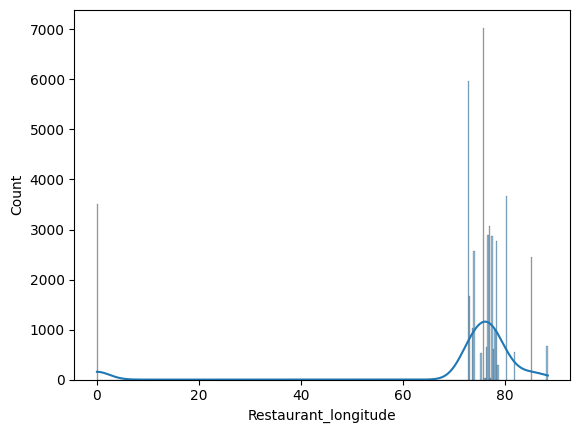

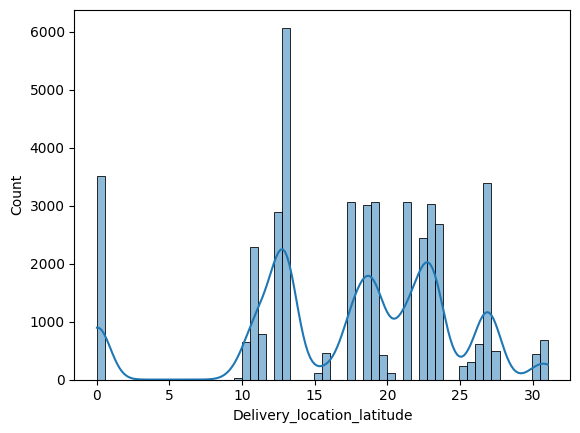

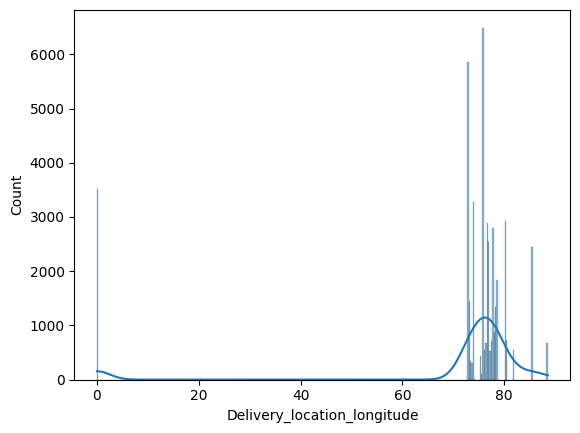

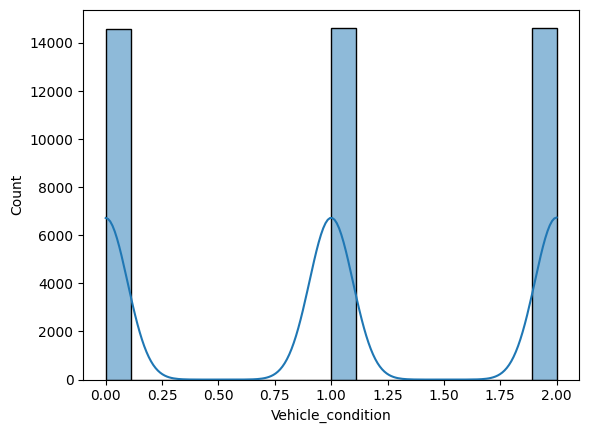

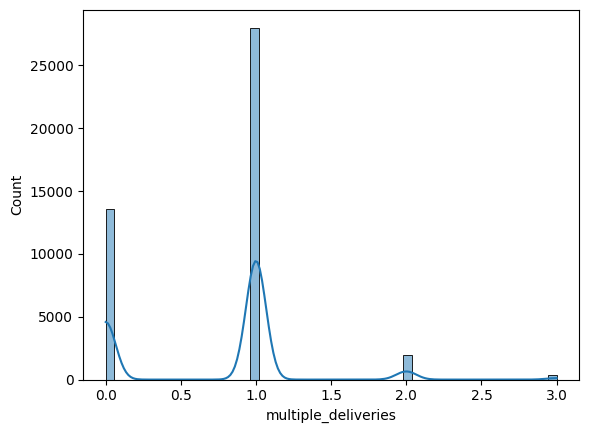

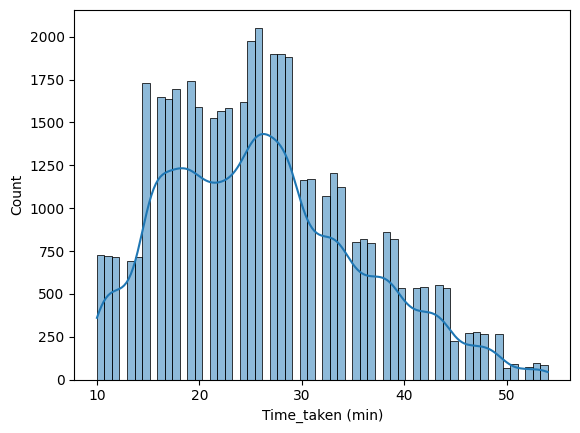

In [71]:
# Plot all numerical features

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

for i in numerical_columns:
    sns.histplot(data=df, x=i, kde=True)
    print("\n")
    plt.show()

In [72]:
#sns.countplot(data=df["Vehicle_condition"])

In [73]:
df["Vehicle_condition"] = df["Vehicle_condition"].astype("object")

In [74]:
# Seggregate into numerical and categorical columns

numerical_columns = df.columns[df.dtypes != "O"]
categorical_columns = df.columns[df.dtypes == "O"]
print("Numerical columns : ", numerical_columns)
print("Categorical columns : ", categorical_columns)

Numerical columns :  Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'multiple_deliveries',
       'Time_taken (min)'],
      dtype='object')
Categorical columns :  Index(['Delivery_person_ID', 'Order_Date', 'Time_Orderd', 'Time_Order_picked',
       'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition',
       'Type_of_order', 'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


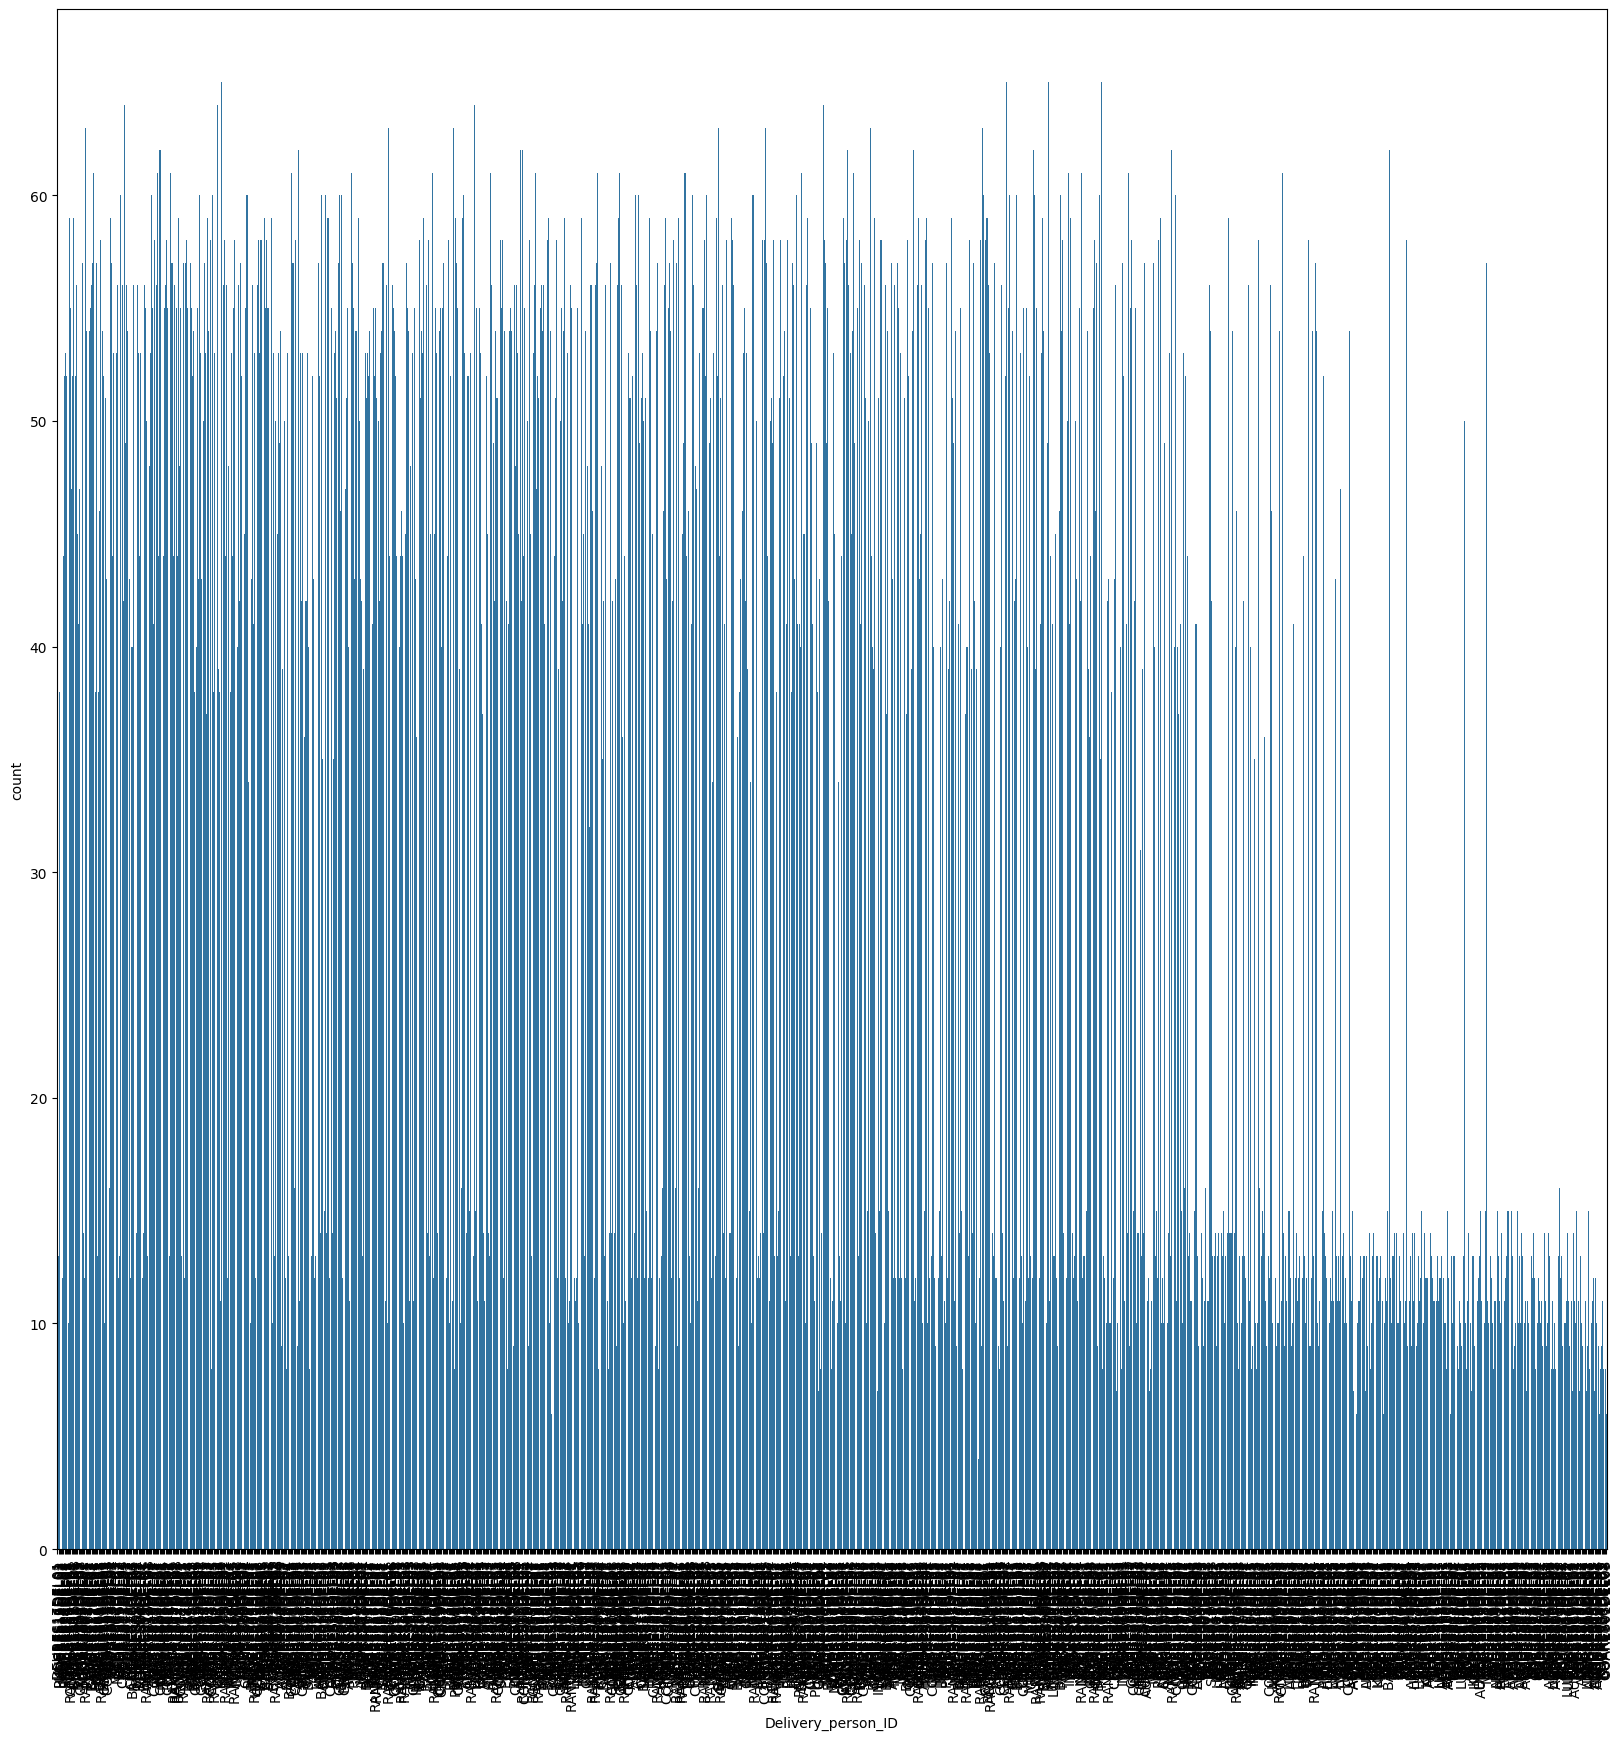

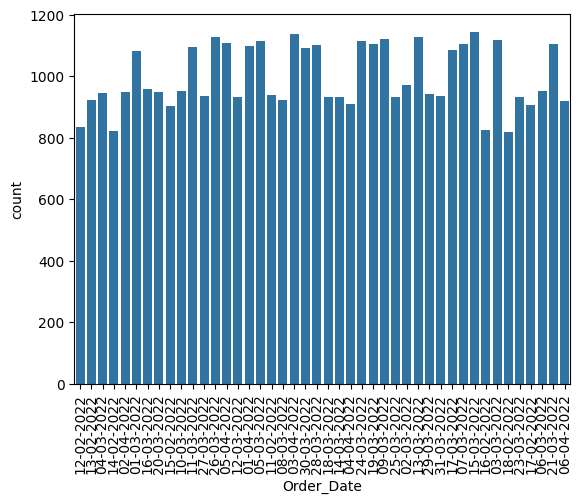

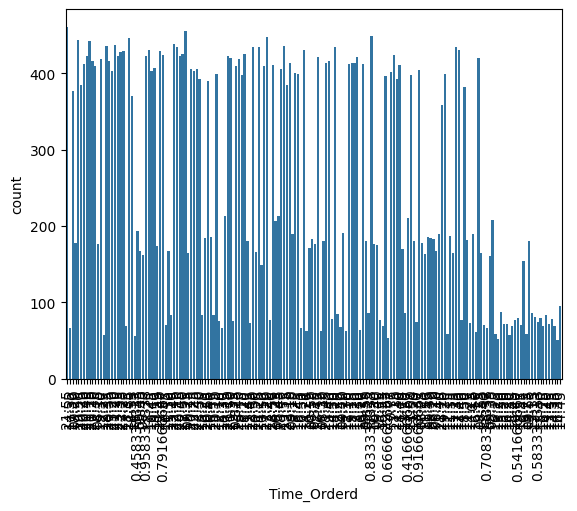

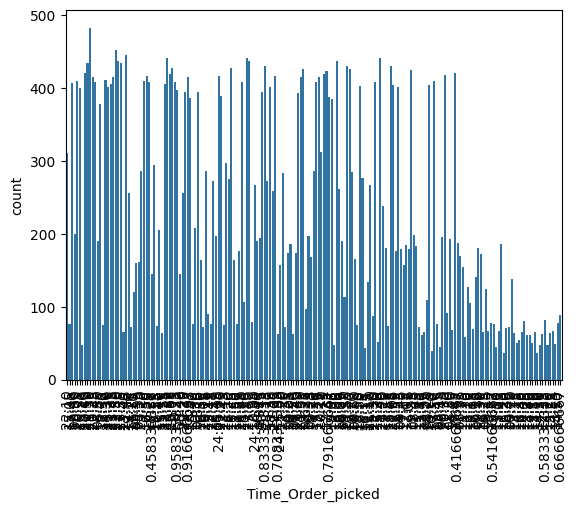

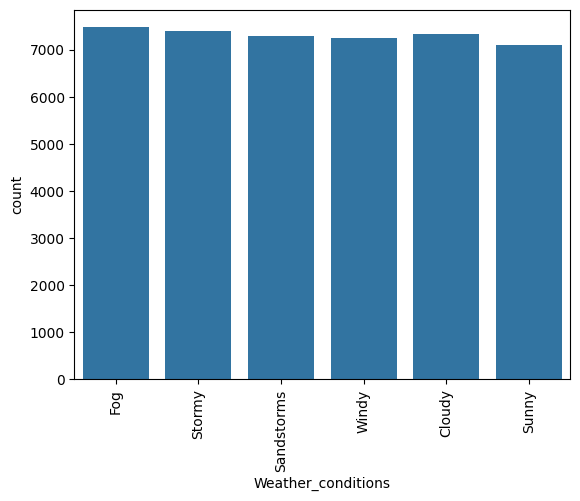

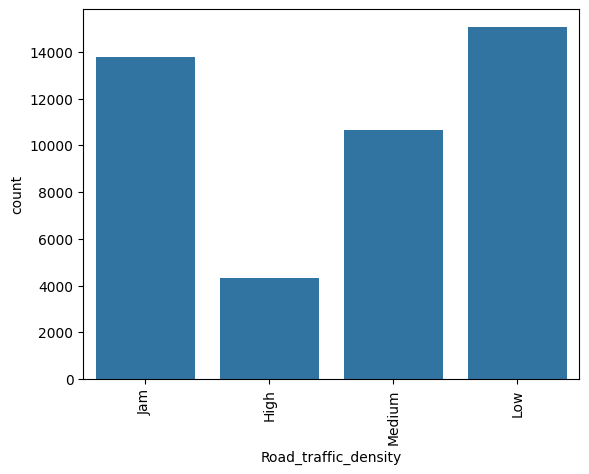

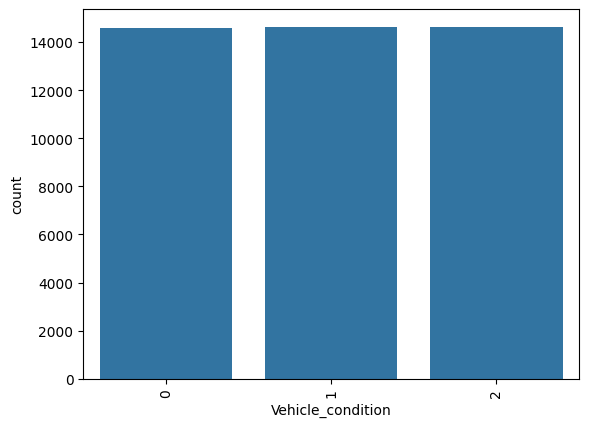

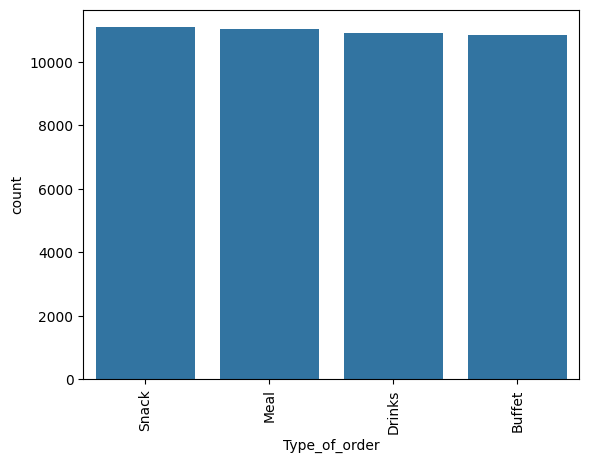

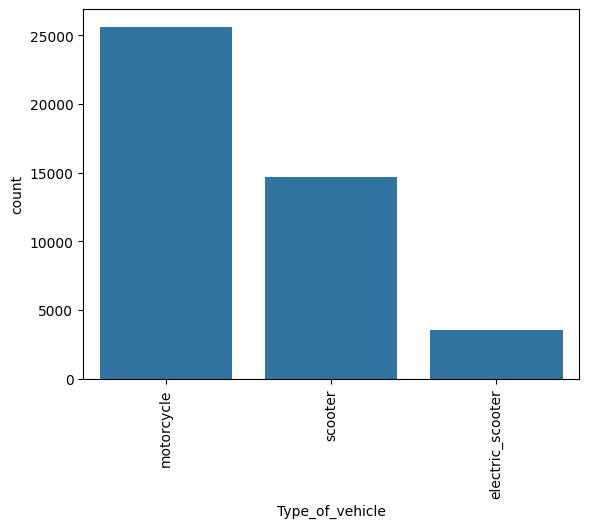

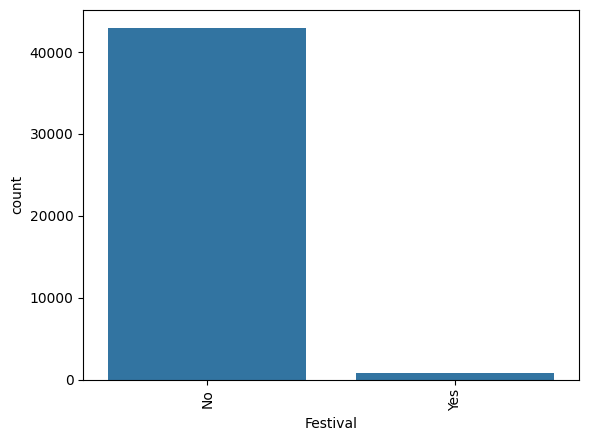

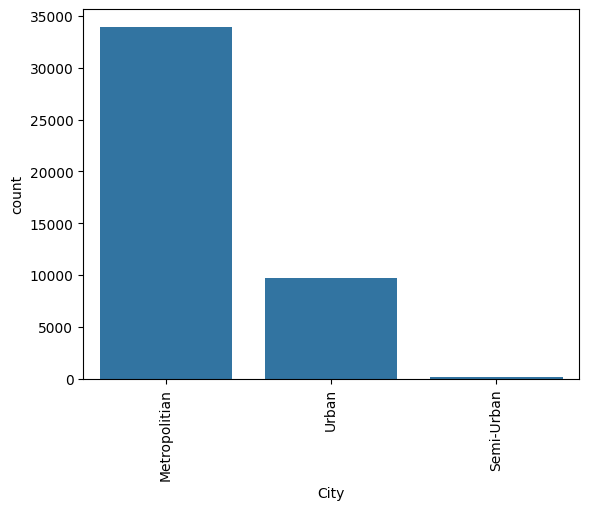

In [75]:
# Plot all categorical features

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

for i in categorical_columns:
    sns.countplot(data=df, x=i)
    print("\n")
    plt.xticks(rotation=90)
    plt.show()

In [76]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [77]:
## Drop Delivery_person_ID as it's not important for delivery time prediction

df = df.drop(labels=["Delivery_person_ID"], axis=1)

In [78]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [79]:
df["Delivery_person_Ratings"].unique()

array([4.2      , 4.7      , 4.3      , 4.5      , 4.       , 4.9      ,
       4.1      , 5.       , 4.8      , 3.5      , 4.6      , 4.4      ,
       3.8      , 4.6337737, 3.9      , 3.7      , 2.6      , 2.5      ,
       3.6      , 3.1      , 2.7      , 3.2      , 3.3      , 3.4      ,
       2.8      , 2.9      , 3.       ])

In [85]:
np.radians(30.327968)

0.5293228970394795

In [90]:
def calculate_sphere_distance(lat1,lon1,lat2,lon2):
    lat1,lon1,lat2,lon2 = map(np.radians, [lat1,lon1,lat2,lon2])
    newlat = lat2 - lat1
    newlon = lon2 - lon1

    haver_formula = np.sin(newlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula))
    km = dist*6371              # 6371 is radius of earth in Km

    return lat1,lon1,lat2,lon2, dist, km

In [91]:
calculate_sphere_distance(30.327968,78.046106,30.397968,78.116106)

(0.5293228970394795,
 1.3621615180605016,
 0.5305446275158756,
 1.3633832485368975,
 0.0016136528119010947,
 10.280582064621875)

In [92]:
def calculate_sphere_distance(lat1,lon1,lat2,lon2):
    lat1,lon1,lat2,lon2 = map(np.radians, [lat1,lon1,lat2,lon2])
    newlat = lat2 - lat1
    newlon = lon2 - lon1

    haver_formula = np.sin(newlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula))
    km = dist*6371              # 6371 is radius of earth in Km

    return km

In [93]:
dist_cols = ['Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude','Delivery_location_longitude']

df["distance"] = df[dist_cols].apply(lambda x : calculate_sphere_distance(x[0],x[1],x[2],x[3]), axis=1)

In [94]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582
1,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319
2,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860
3,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258
4,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618


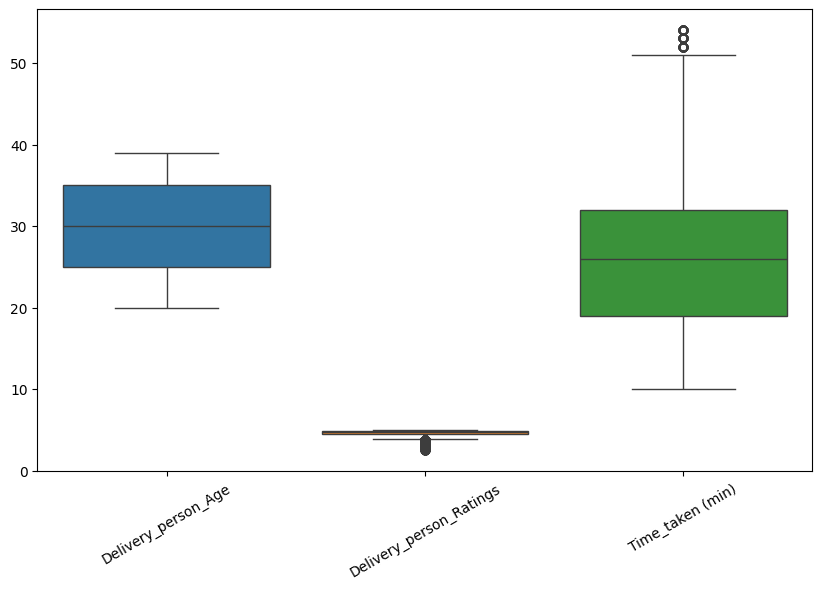

In [95]:
## Box plot to identify outliers

d = ["Delivery_person_Age", "Delivery_person_Ratings", "Time_taken (min)" ]

plt.figure(figsize=(10,6))
sns.boxplot(data =df[d])
plt.xticks(rotation=30)
plt.show()

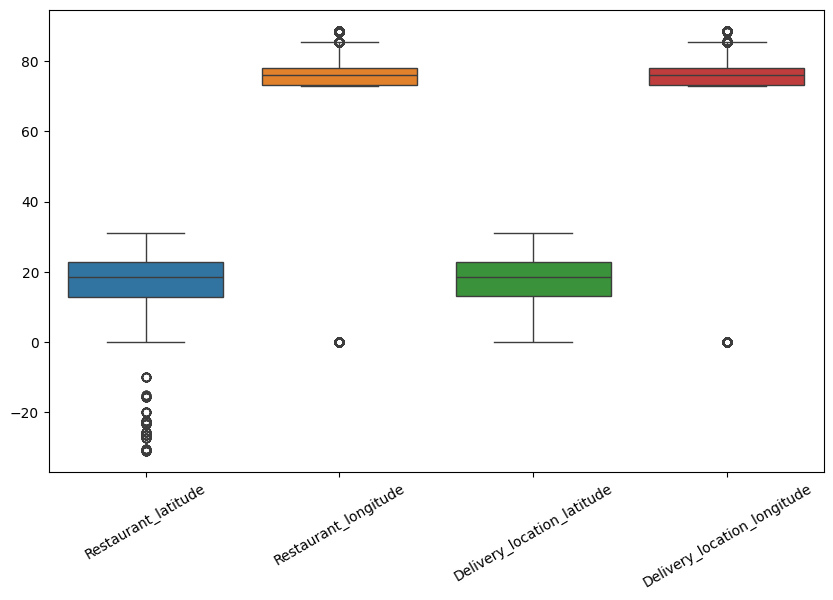

In [96]:
plt.figure(figsize=(10,6))
sns.boxplot(data =df[dist_cols])
plt.xticks(rotation=30)
plt.show()

In [103]:
numerical_columns = df.columns[df.dtypes != "O"]
categorical_columns = df.columns[df.dtypes == "O"]
print("Numerical columns : ", numerical_columns)
print("Categorical columns : ", categorical_columns)

Numerical columns :  Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'multiple_deliveries',
       'Time_taken (min)', 'distance'],
      dtype='object')
Categorical columns :  Index(['Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'Festival', 'City'],
      dtype='object')


In [104]:
## Rounding Numerical columns to 2 decimal points

c = list(numerical_columns)

In [105]:
numerical_columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'multiple_deliveries',
       'Time_taken (min)', 'distance'],
      dtype='object')

In [106]:
c

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'multiple_deliveries',
 'Time_taken (min)',
 'distance']

In [107]:
df[c] = df[c].round(2)

In [108]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,36.0,4.2,30.33,78.05,30.40,78.12,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.28
1,21.0,4.7,10.00,76.31,10.04,76.35,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.24
2,23.0,4.7,18.56,73.92,18.65,74.01,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.79
3,34.0,4.3,30.90,75.81,30.92,75.83,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.93
4,24.0,4.7,26.46,80.37,26.59,80.50,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.40


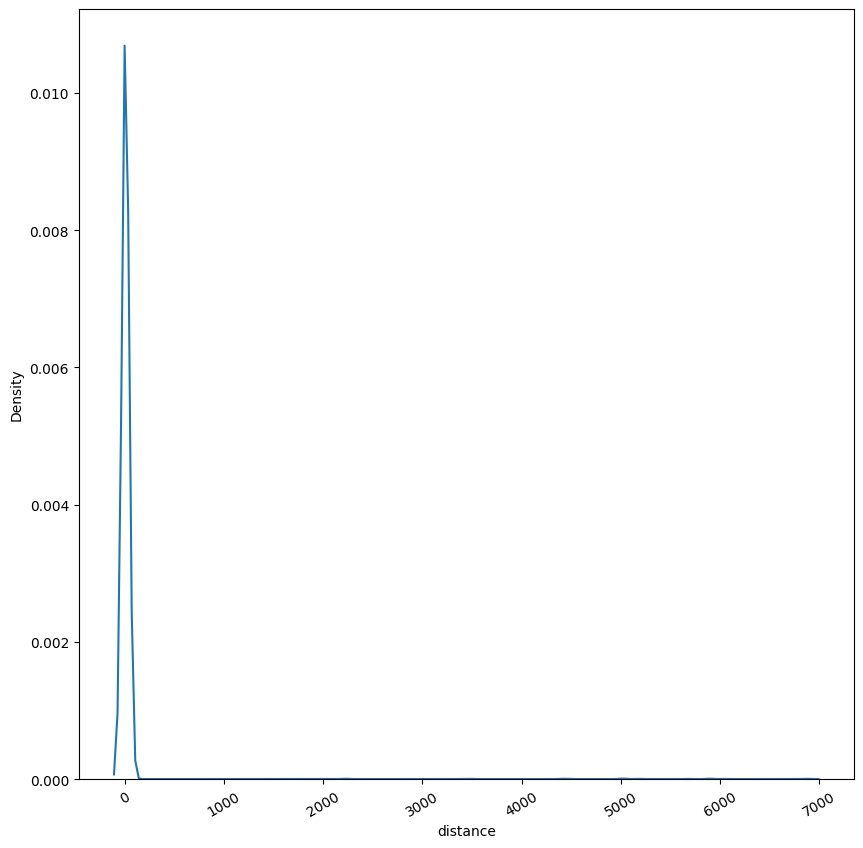

In [126]:
plt.figure(figsize=(10,10))
sns.kdeplot(df["distance"])
plt.xticks(rotation=30)
plt.show()

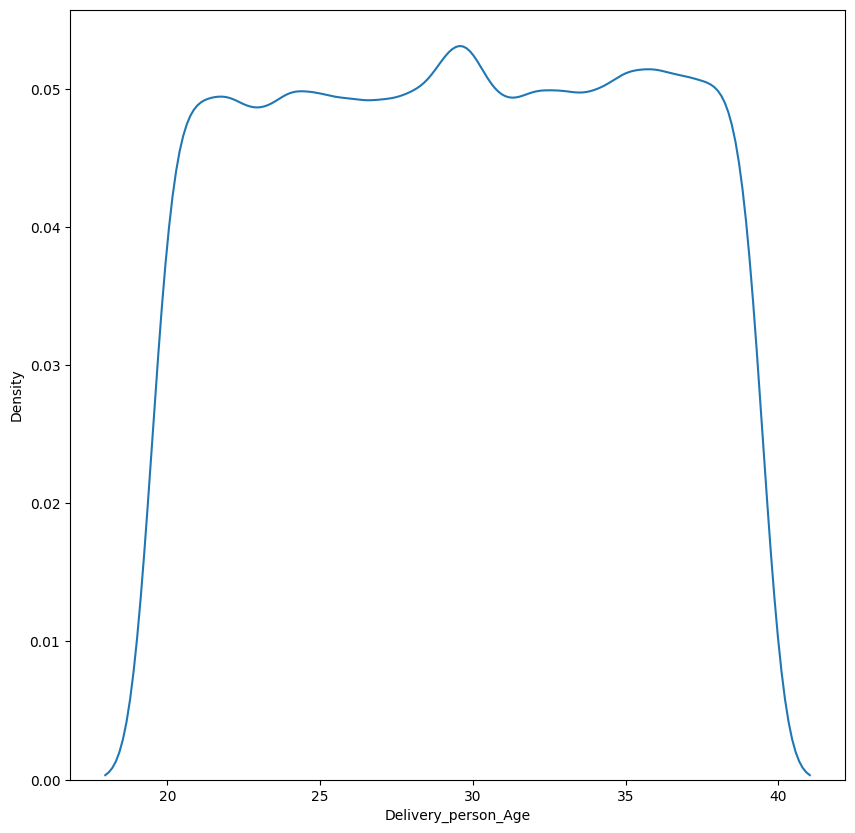

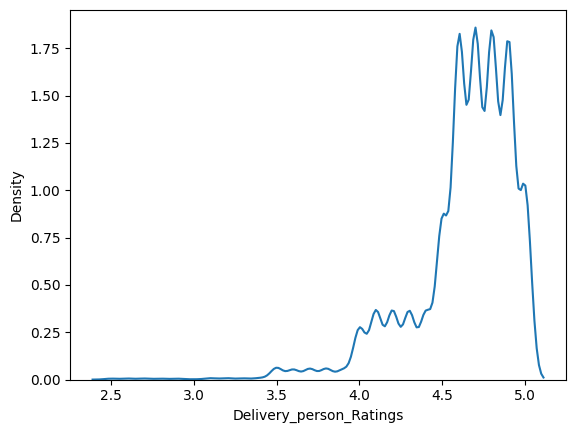

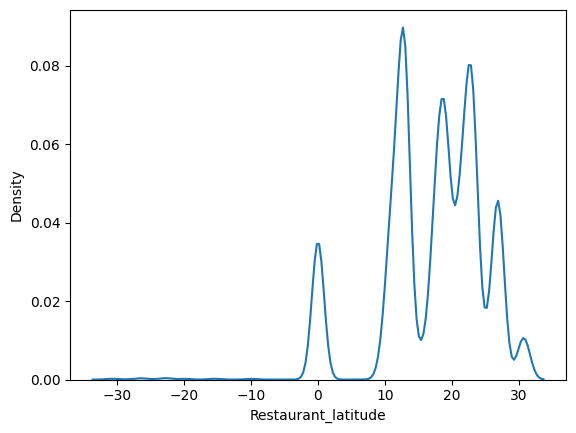

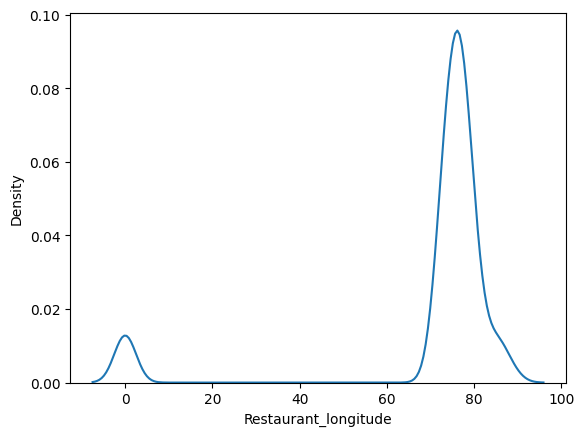

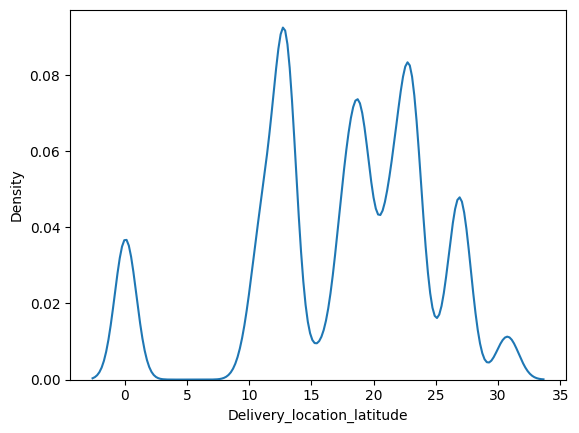

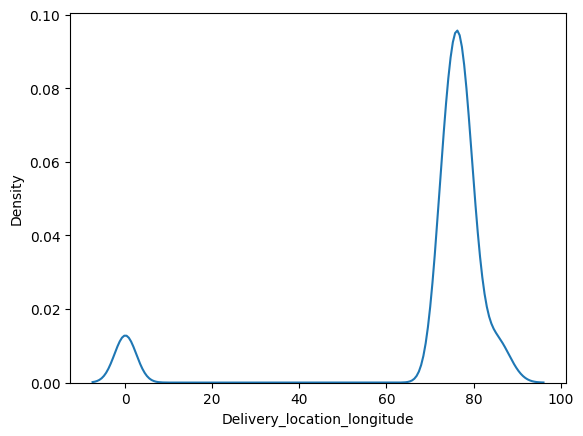

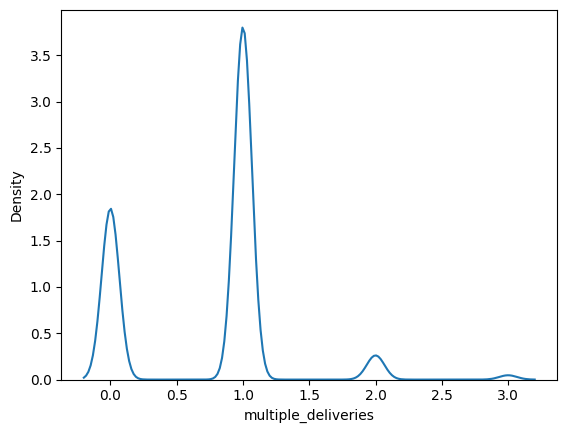

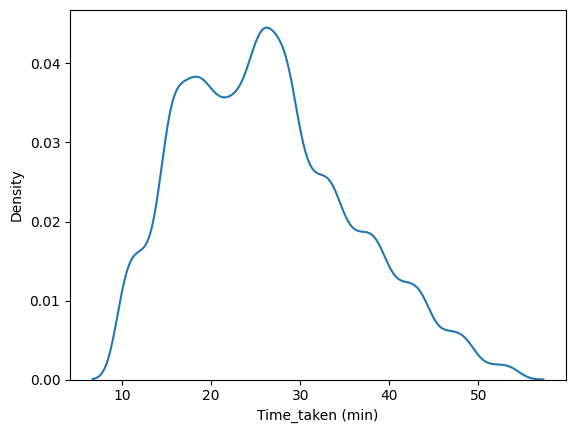

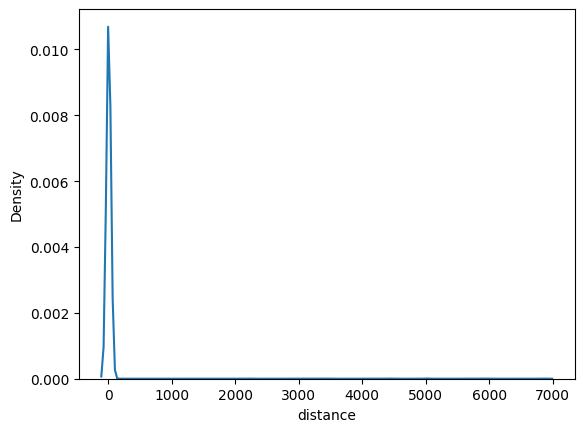

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

for i in numerical_columns:
    sns.kdeplot(data=df[i])
    print("\n")
    plt.show()

In [129]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,36.0,4.2,30.33,78.05,30.40,78.12,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.28
1,21.0,4.7,10.00,76.31,10.04,76.35,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.24
2,23.0,4.7,18.56,73.92,18.65,74.01,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.79
3,34.0,4.3,30.90,75.81,30.92,75.83,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.93
4,24.0,4.7,26.46,80.37,26.59,80.50,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.40


In [130]:
df[numerical_columns].corr()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,multiple_deliveries,Time_taken (min),distance
Delivery_person_Age,1.000000,-0.117515,0.001400,0.000078,0.002448,0.000075,0.115142,0.303038,0.002626
Delivery_person_Ratings,-0.117515,1.000000,-0.012044,-0.013446,-0.013506,-0.013633,-0.123882,-0.359838,-0.002882
Restaurant_latitude,0.001400,-0.012044,1.000000,0.650090,0.935339,0.650143,0.007635,0.015242,-0.306407
Restaurant_longitude,0.000078,-0.013446,0.650090,1.000000,0.690735,0.999998,0.003873,0.008072,0.023274
Delivery_location_latitude,0.002448,-0.013506,0.935339,0.690735,1.000000,0.690797,0.008470,0.014814,0.050137
Delivery_location_longitude,0.000075,-0.013633,0.650143,0.999998,0.690797,1.000000,0.004088,0.008630,0.023300
multiple_deliveries,0.115142,-0.123882,0.007635,0.003873,0.008470,0.004088,1.000000,0.379195,0.001860
Time_taken (min),0.303038,-0.359838,0.015242,0.008072,0.014814,0.008630,0.379195,1.000000,-0.001546
distance,0.002626,-0.002882,-0.306407,0.023274,0.050137,0.023300,0.001860,-0.001546,1.000000


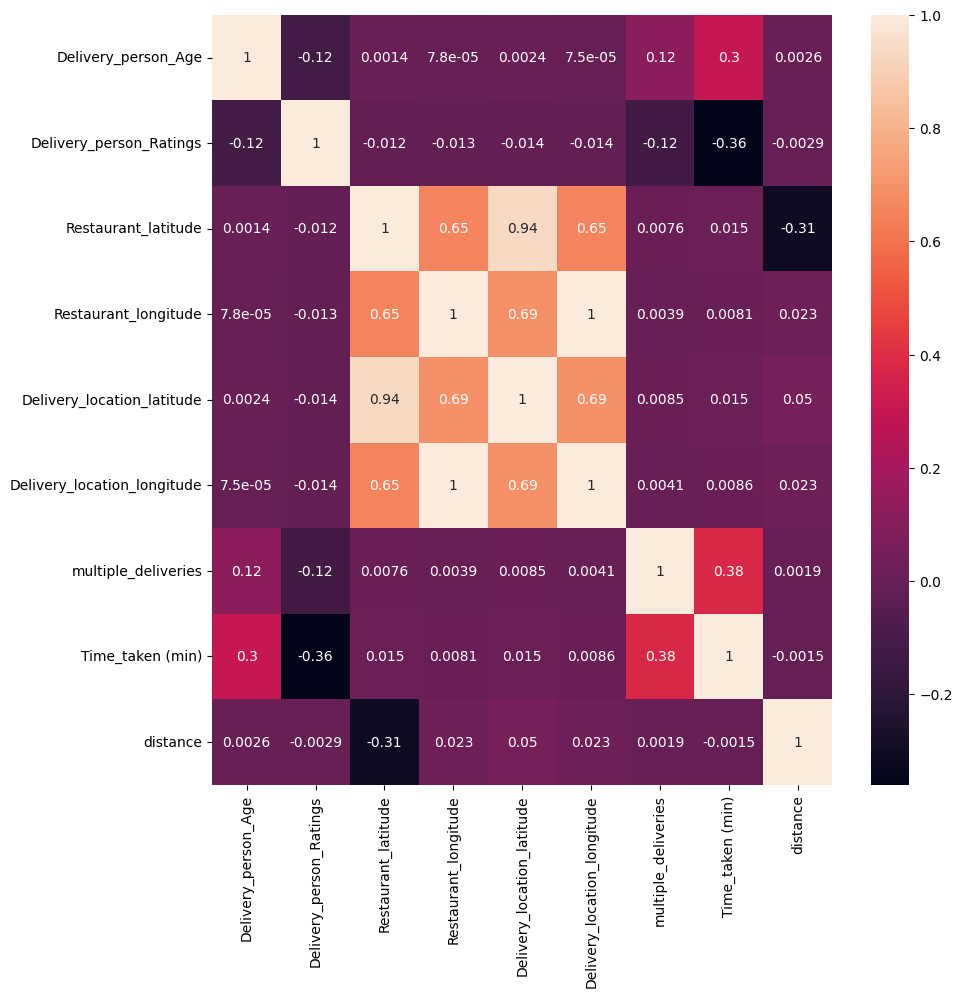

In [133]:
## Correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

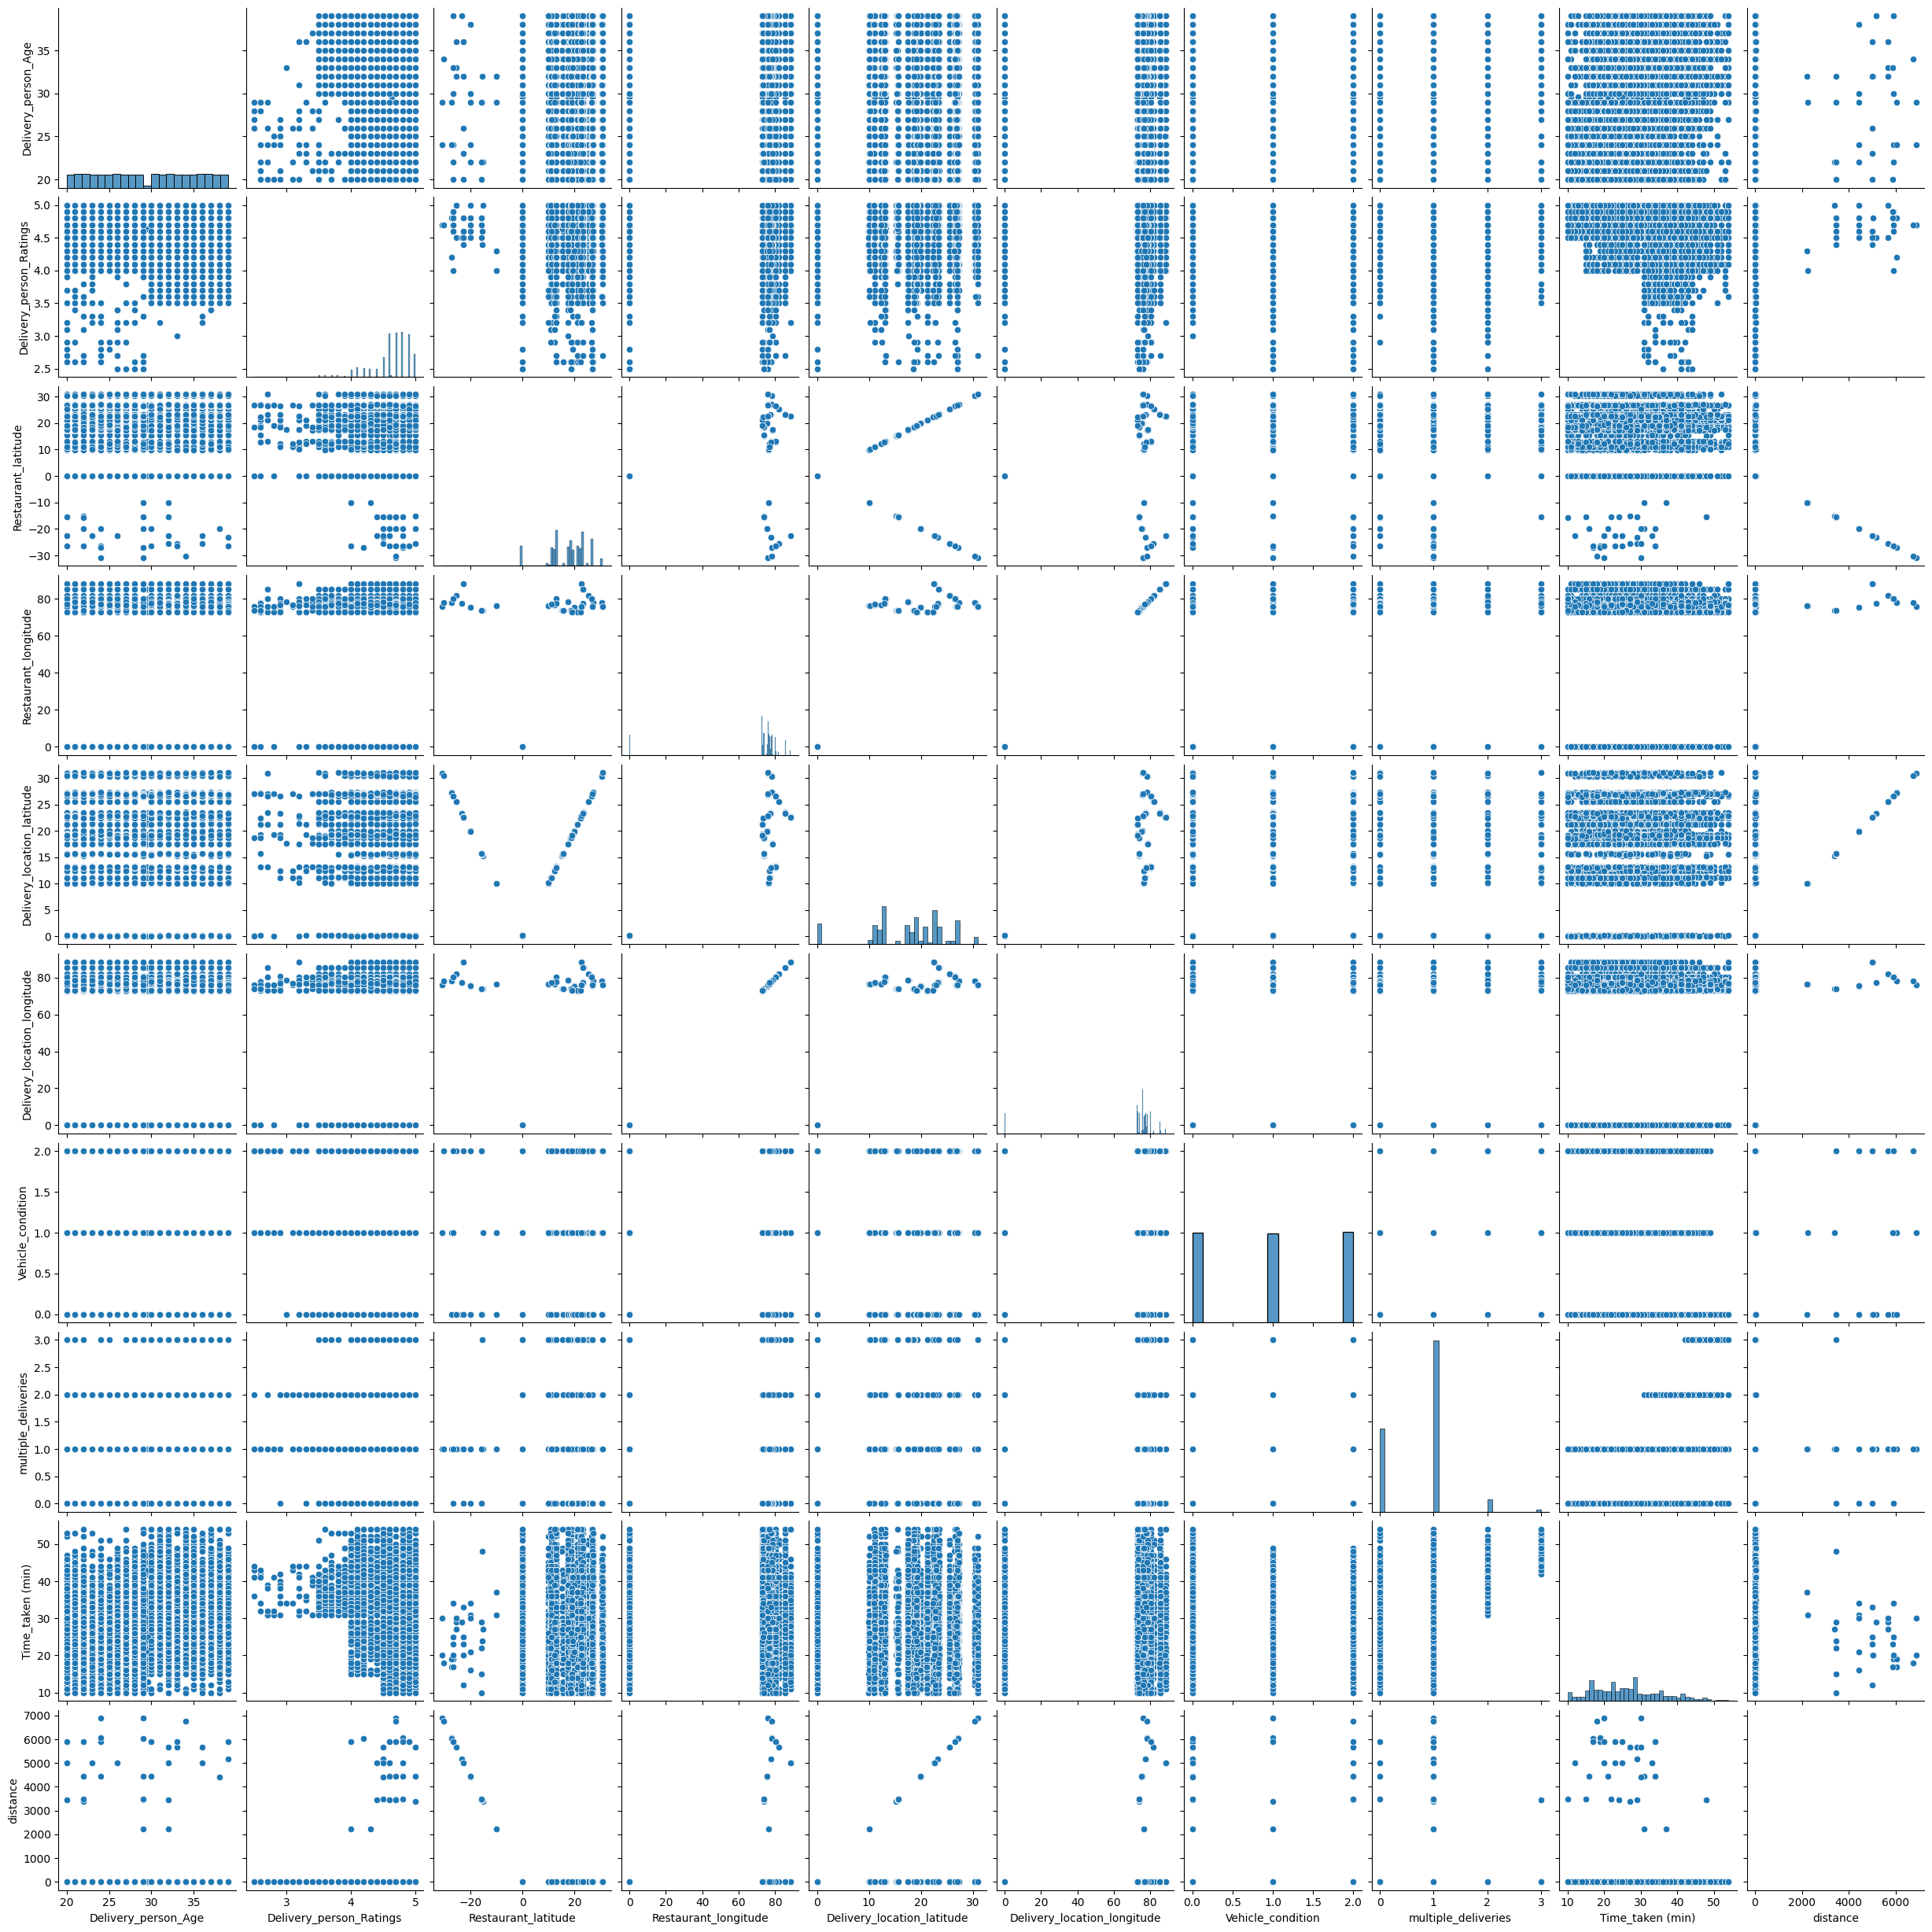

In [135]:
sns.pairplot(df.sample(n=10000))

<Axes: xlabel='distance', ylabel='Time_taken (min)'>

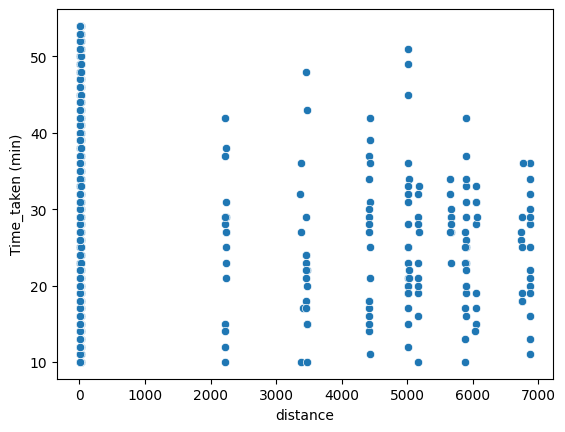

In [136]:
sns.scatterplot(data=df, x="distance", y="Time_taken (min)")

<Axes: xlabel='Delivery_person_Age', ylabel='Time_taken (min)'>

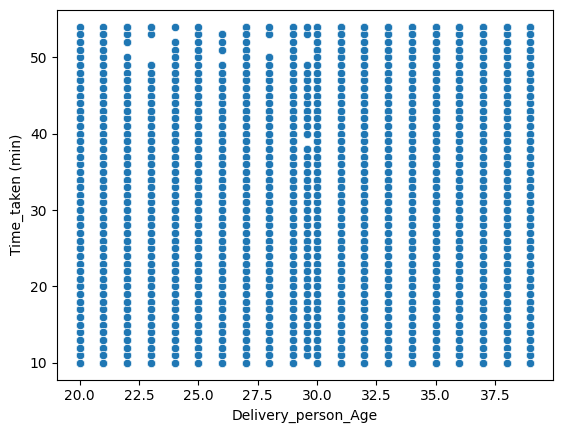

In [139]:
sns.scatterplot(data=df, x="Delivery_person_Age", y="Time_taken (min)")

<Axes: xlabel='Vehicle_condition', ylabel='Time_taken (min)'>

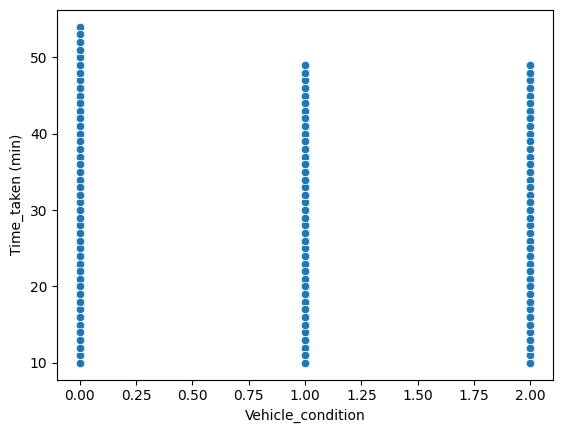

In [140]:
sns.scatterplot(data=df, x="Vehicle_condition", y="Time_taken (min)")

In [134]:
df[categorical_columns].head()

,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,Festival,City
0,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,No,Metropolitian
1,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,No,Metropolitian
2,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,No,Metropolitian
3,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,No,Metropolitian
4,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,No,Metropolitian


In [141]:
df["Type_of_order"].unique()

array(['Snack', 'Meal', 'Drinks', 'Buffet'], dtype=object)

In [144]:
df["Type_of_vehicle"].unique()

array(['motorcycle', 'scooter', 'electric_scooter'], dtype=object)

In [145]:
df["City"].unique()

array(['Metropolitian', 'Urban', 'Semi-Urban'], dtype=object)

In [146]:
pd.get_dummies(df["City"])

,Metropolitian,Semi-Urban,Urban
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
43848,True,False,False
43849,True,False,False
43850,True,False,False
43851,True,False,False


In [147]:
pd.get_dummies(df["City"], drop_first=True)

,Semi-Urban,Urban
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
43848,False,False
43849,False,False
43850,False,False
43851,False,False


In [148]:
pd.get_dummies(df[["Type_of_order", "Type_of_vehicle","City"]])

,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban
0,False,False,False,True,False,True,False,True,False,False
1,False,False,True,False,False,True,False,True,False,False
2,False,True,False,False,False,False,True,True,False,False
3,True,False,False,False,False,True,False,True,False,False
4,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...
43848,False,False,True,False,False,True,False,True,False,False
43849,True,False,False,False,False,True,False,True,False,False
43850,False,True,False,False,False,False,True,True,False,False
43851,False,False,False,True,False,True,False,True,False,False


In [149]:
pd.get_dummies(df[["Type_of_order", "Type_of_vehicle","City"]], drop_first=True)

,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Semi-Urban,City_Urban
0,False,False,True,True,False,False,False
1,False,True,False,True,False,False,False
2,True,False,False,False,True,False,False
3,False,False,False,True,False,False,False
4,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...
43848,False,True,False,True,False,False,False
43849,False,False,False,True,False,False,False
43850,True,False,False,False,True,False,False
43851,False,False,True,True,False,False,False


In [153]:
# Final Data Cleaning

In [154]:
df.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,36.0,4.2,30.33,78.05,30.40,78.12,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.28
1,21.0,4.7,10.00,76.31,10.04,76.35,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.24


In [155]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)',
       'distance'],
      dtype='object')

In [156]:
cols_to_drop = ['Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked']

In [158]:
df =df.drop(labels = cols_to_drop, axis = 1)

In [159]:
df.head(2)

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.28
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.24


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43853 entries, 0 to 43852
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      43853 non-null  float64
 1   Delivery_person_Ratings  43853 non-null  float64
 2   Weather_conditions       43853 non-null  object 
 3   Road_traffic_density     43853 non-null  object 
 4   Vehicle_condition        43853 non-null  object 
 5   Type_of_order            43853 non-null  object 
 6   Type_of_vehicle          43853 non-null  object 
 7   multiple_deliveries      43853 non-null  float64
 8   Festival                 43853 non-null  object 
 9   City                     43853 non-null  object 
 10  Time_taken (min)         43853 non-null  int64  
 11  distance                 43853 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 4.0+ MB


In [162]:
num_df = df.select_dtypes(exclude= "object")
cat_df = df.select_dtypes(include= "object")

C:\Users\manoh\AppData\Local\Temp\ipykernel_4380\3399077723.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = df[num_df.columns[i]], shade = True, color = "r")
C:\Users\manoh\AppData\Local\Temp\ipykernel_4380\3399077723.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = df[num_df.columns[i]], shade = True, color = "r")
C:\Users\manoh\AppData\Local\Temp\ipykernel_4380\3399077723.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x = df[num_df.columns[i]], shade = True, color = "r")
C:\Users\manoh\AppData\Local\Temp\ipykernel_4380\3399077723.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; s

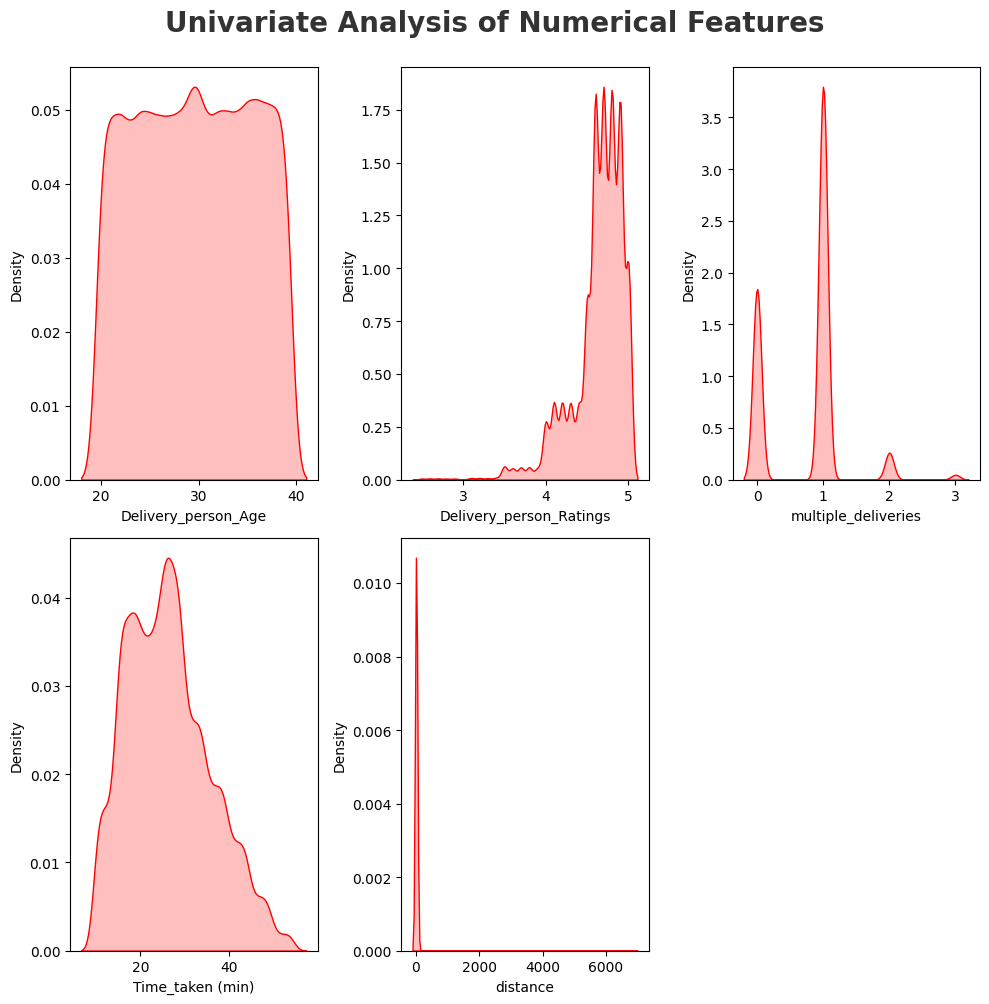

In [169]:
## Univariate analysis for numerical features

plt.figure(figsize=(10, 10))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight="bold", alpha=0.8, y=1.)

for i in range(0, len(num_df.columns)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x = df[num_df.columns[i]], shade = True, color = "r")
    plt.xlabel(num_df.columns[i])
    plt.tight_layout()

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore")

%matplotlib inline

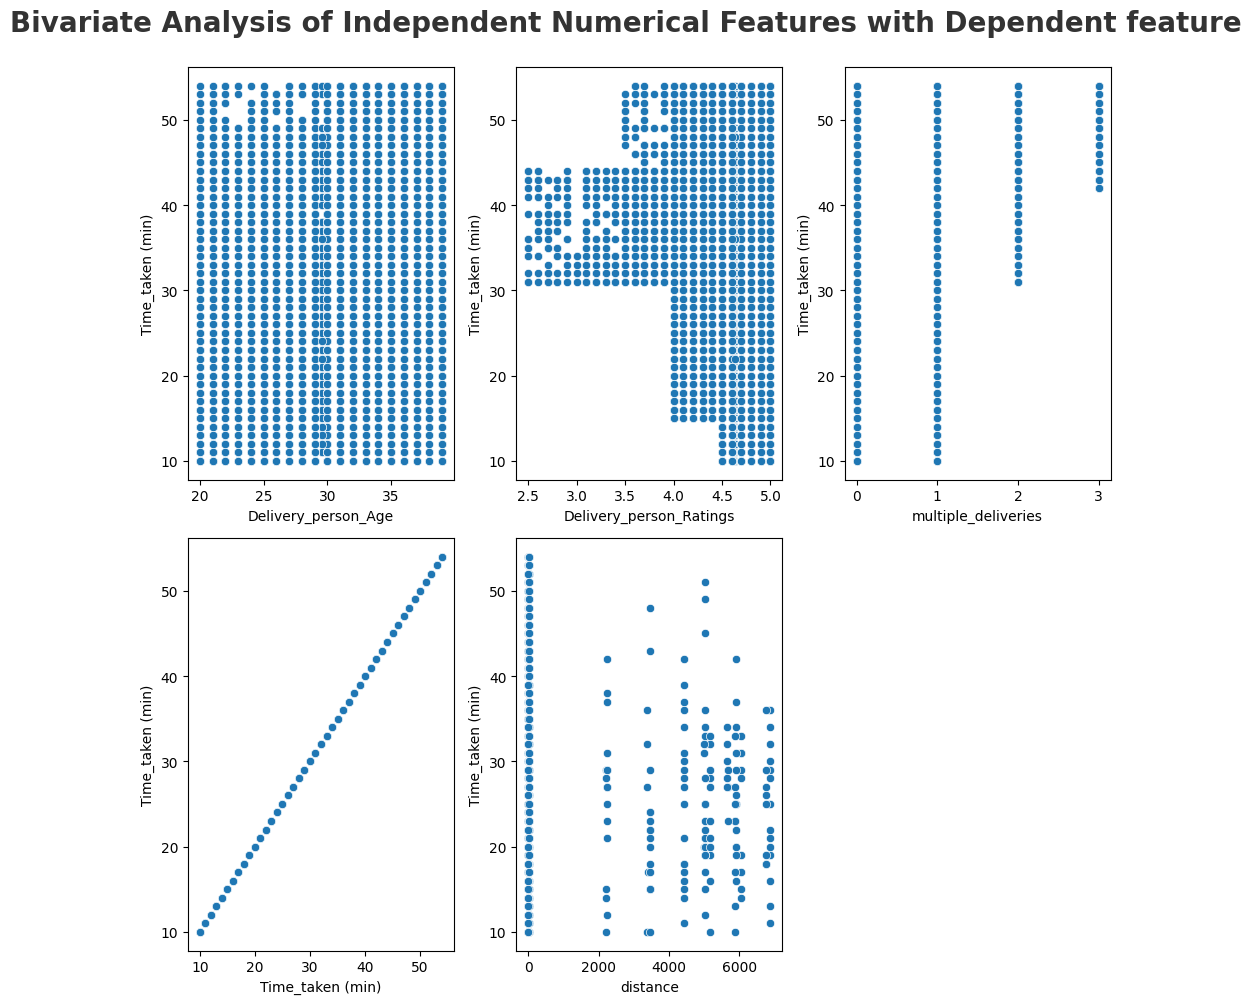

In [173]:
## Bivariate analysis for numerical features

plt.figure(figsize=(10, 10))
plt.suptitle("Bivariate Analysis of Independent Numerical Features with Dependent feature", fontsize=20, fontweight="bold", alpha=0.8, y=1.)

for i in range(0, len(num_df.columns)):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=num_df, x = num_df.columns[i], y="Time_taken (min)")
    plt.xlabel(num_df.columns[i])
    plt.tight_layout()

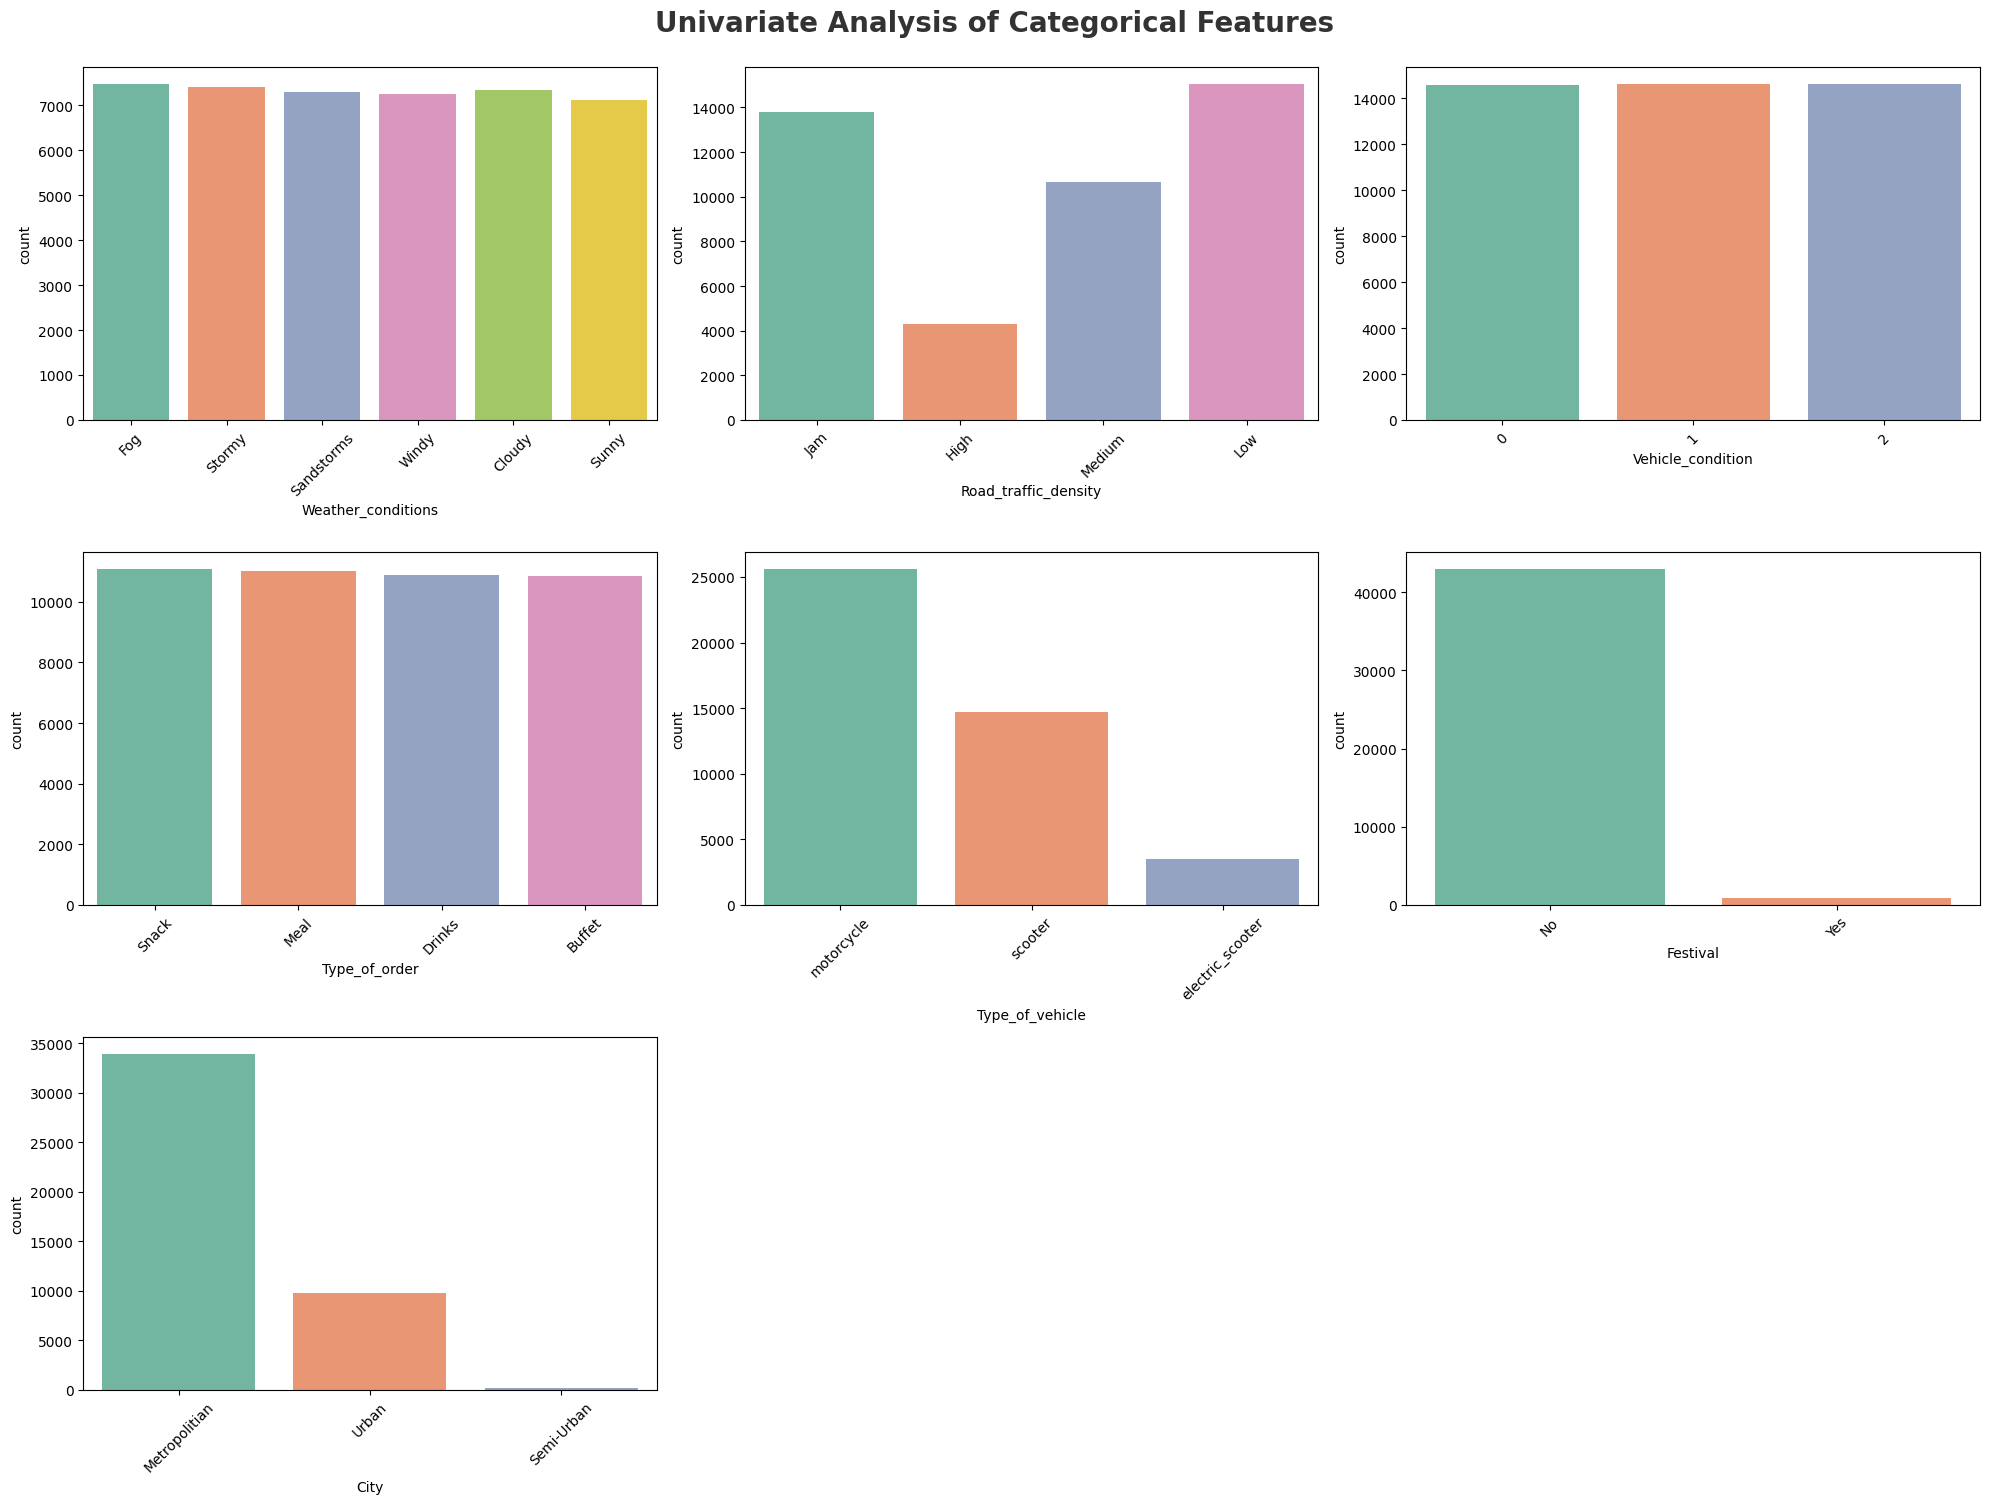

In [176]:
# categorical columns count plot

plt.figure(figsize=(20, 15))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20, fontweight="bold", alpha=0.8, y=1.)
category = cat_df.columns
for i in range(0, len(category)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df[category[i]], palette = "Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation = 45)
    plt.tight_layout()

In [179]:
df.to_csv("./data/finalcleandata.csv", index=False)

In [4]:
df1 = pd.read_csv("./data/finalcleandata.csv")

In [1]:
## Categorical column analysis

In [5]:
df1.head()

,Delivery_person_Age,Delivery_person_Ratings,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.28
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.24
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.79
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.93
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.40


In [6]:
df1["Weather_conditions"].value_counts()

Weather_conditions
Fog           7475
Stormy        7400
Cloudy        7336
Sandstorms    7284
Windy         7251
Sunny         7107
Name: count, dtype: int64

In [7]:
df1["Road_traffic_density"].value_counts()

Road_traffic_density
Low       15061
Jam       13796
Medium    10676
High       4320
Name: count, dtype: int64

In [8]:
df1["Vehicle_condition"].value_counts()

Vehicle_condition
2    14639
1    14615
0    14599
Name: count, dtype: int64

In [9]:
df1["Type_of_order"].value_counts()

Type_of_order
Snack     11088
Meal      11016
Drinks    10896
Buffet    10853
Name: count, dtype: int64

In [10]:
df1["Type_of_vehicle"].value_counts()

Type_of_vehicle
motorcycle          25627
scooter             14692
electric_scooter     3534
Name: count, dtype: int64

In [11]:
df1["Festival"].value_counts()

Festival
No     42996
Yes      857
Name: count, dtype: int64

In [14]:
df1["City"].value_counts()

City
Metropolitian    33940
Urban             9757
Semi-Urban         156
Name: count, dtype: int64